### Import Libraries

In [1]:
#Pretrained Model InceptionV3 without Top Layer
# !wget https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [2]:

import tensorflow_datasets as tfds
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

----

### Create Model

In [3]:
#Use pretrained model as transfer learning layers
local_weight_file = './pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [4]:
# Load the downloaded pre-trained weights
pre_trained_model.load_weights(local_weight_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [6]:
#Specify input layer model

last_layer = pre_trained_model.get_layer('mixed6')

last_output = last_layer.output

In [7]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.MaxPooling2D()(last_output)
x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
# Add a dropout rate of 0.3
x = layers.Dropout(0.3)(x) 
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)         

# Append the dense network to the base model
skintypeModel = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
skintypeModel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 7,082,289 (27.02 MB)

 Trainable params: 250,897 (980.07 KB)

 Non-trainable params: 6,831,392 (26.06 MB)

In [8]:
# Set the training parameters
skintypeModel.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [9]:
base_dir = '../Dataset/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training dry pictures
train_dry_dir = os.path.join(train_dir, 'dry') 

# Directory with training oily pictures
train_oily_dir = os.path.join(train_dir, 'oily') 

# Directory with validation dry pictures
validation_dry_dir = os.path.join(validation_dir, 'dry') 

# Directory with validation oily pictures
validation_oily_dir = os.path.join(validation_dir, 'oily')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['dry', 'oily'],
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         classes=['dry', 'oily'],
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 200 images belonging to 2 classes.


Found 110 images belonging to 2 classes.


In [10]:
#Defining callback for preventing underfitting and overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and (logs.get('accuracy') > 0.985 or logs.get('accuracy') < 0.4):
            print("\nCancelling training")
            self.model.stop_training = True

In [11]:
#Train the model
callbacks = myCallback()
history = skintypeModel.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 15,
            callbacks=[callbacks])

Epoch 1/15


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5502 - loss: 0.6905 - val_accuracy: 0.6000 - val_loss: 0.6845
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.6217 - loss: 0.6671 - val_accuracy: 0.7364 - val_loss: 0.6483
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.6765 - loss: 0.6388 - val_accuracy: 0.6909 - val_loss: 0.5972
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step - accuracy: 0.8084 - loss: 0.5705 - val_accuracy: 0.7273 - val_loss: 0.5290
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 517ms/step - accuracy: 0.7553 - loss: 0.5304 - val_accuracy: 0.7818 - val_loss: 0.4665
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.8161 - loss: 0.4564 - val_accuracy: 0.8364 - val_loss: 0.4186
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 687ms/step - accuracy: 0.8132 - loss: 0.4036 - val_accuracy: 0.8273 - val_loss: 0.3560
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 594ms/step - accuracy: 0.8033 - loss: 0.4218 - val_accuracy: 0.8727 - val_lo

----

### Visualizing Accuracy Plot

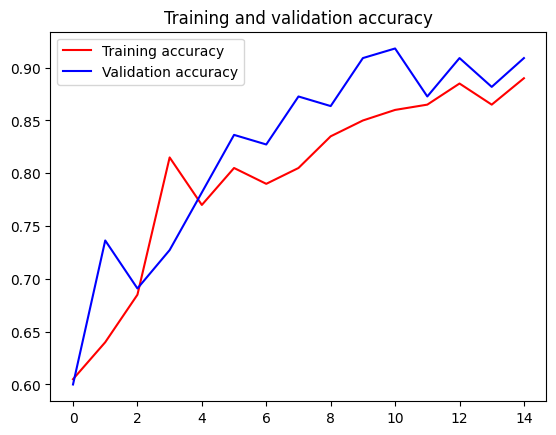

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

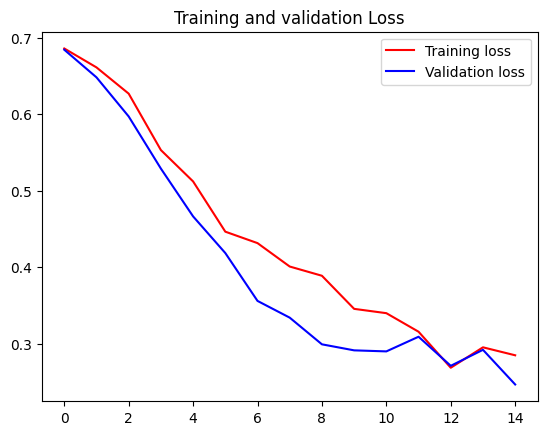

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

----

### Try Input Image

In [ ]:
import numpy as np
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.utils import load_img, img_to_array

#Code for open dialog window on Local Machine
root = tk.Tk()
root.withdraw()
uploaded = filedialog.askopenfilename()
 
#Predicting images
path = 'normal.jpg'
img = load_img(path, target_size=(150, 150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = skintypeModel.predict(images, batch_size=10)

if classes[0]>0.5:
  print("oily")
else:
  print("dry")
 

----

### Convert and Save Model

In [65]:
import pickle

dump = {
    'skintype':skintypeModel,
}
# Save your model to a file using pickle
with open("skintypemodel.pkl", "wb") as f:
    pickle.dump(dump, f)

In [66]:
skintypeModel.save("skintypeModel")

INFO:tensorflow:Assets written to: skintypeModel\assets


INFO:tensorflow:Assets written to: skintypeModel\assets


In [15]:
import pickle

# Load the previously saved model from a file
with open("scanningmodel.pkl", "rb") as f:
    loaded_models = pickle.load(f)

# Get the existing models from the loaded dictionary
acneModel = loaded_models['acne']
rednessModel = loaded_models['redness']

# Create a dictionary with your models
dump = {
    'acne': acneModel,
    'redness': rednessModel,
    'skintype': skintypeModel, 
}

# Save your models to a file using pickle
with open("scanningmodel.pkl", "wb") as f:
    pickle.dump(dump, f)


In [67]:
skintypeModel.save("skintypeModel.h5")